In [23]:
# Import the tools and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [24]:
# Import the data
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
#***Exploratpory Data Analysis
#we need to find out more about our data...
# Check the shape of the dataset
print("Number of rows in the dataset: ", df.shape[0])
print("Number of columns in the dataset: ", df.shape[1])


Number of rows in the dataset:  1025
Number of columns in the dataset:  14


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The number of subjects with heart disease:  526
The number of subjects without heart disease:  499


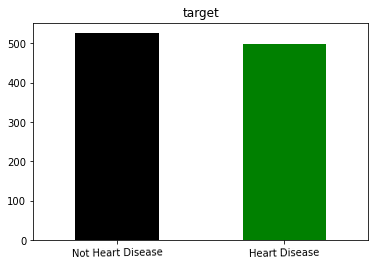

In [28]:


# How many of each class are there?
df['target'].value_counts()

print("The number of subjects with heart disease: ", len(df[df['target'] == 1]))
print("The number of subjects without heart disease: ", len(df[df['target'] == 0]))

df['target'].value_counts().plot(kind='bar',title='target',color=['black','green'])
plt.xticks([1, 0], ["Heart Disease", "Not Heart Disease"], rotation=1);


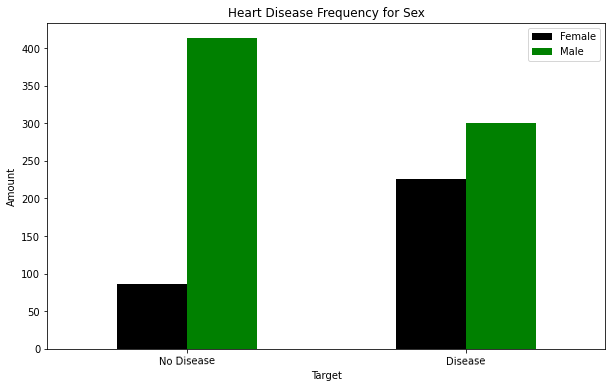

In [29]:
#Heart Disease Frequency According to Sex

# Create a plot of a crosstab of the Sex and Target columns
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['black', 'green'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Target")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks([0, 1], ["No Disease", "Disease"], rotation=1);


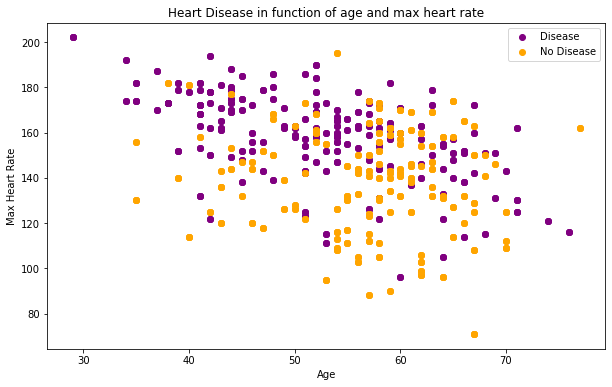

In [10]:
#Age vs. Max Heart Rate
#Now we'll create a scatter plot to show patterns between the maximum heart rate of subjects against their age.

# Create a figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='purple')
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='orange')
# Add title, labels and legend
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);



In [30]:
#print numbers of outliers.

print("Number of subjects under 40 years old: ", len(df.loc[df['age'] < 40]))
print("Number of subjects over 70 years old: ", len (df.loc[df["age"] > 70]))

Number of subjects under 40 years old:  57
Number of subjects over 70 years old:  20


In [32]:
# Perhaps now we can drop all examples of subjects with age < 40 and > 70 to deal with outliers we can see in the above scatter plot.# Drop the outliers
under_40 = df[df['age']<40].index
over_70 = df[df['age']>70].index

df.drop(under_40, inplace=True)
df.drop(over_70, inplace=True)

In [33]:

# Check that the outliers have been removed

print("Number of subjects under 40 years old: ", len(df.loc[df['age'] < 40]))
print("Number of subjects over 70 years old: ", len (df.loc[df["age"] > 70]))


Number of subjects under 40 years old:  0
Number of subjects over 70 years old:  0


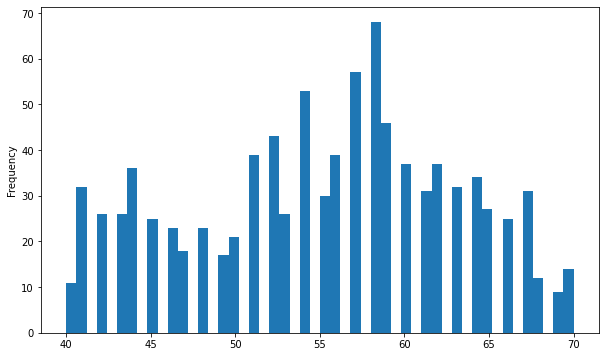

In [34]:
# Check the distribution of the modified Dataframe
df.age.plot.hist(figsize=(10, 6),
                 bins=50);

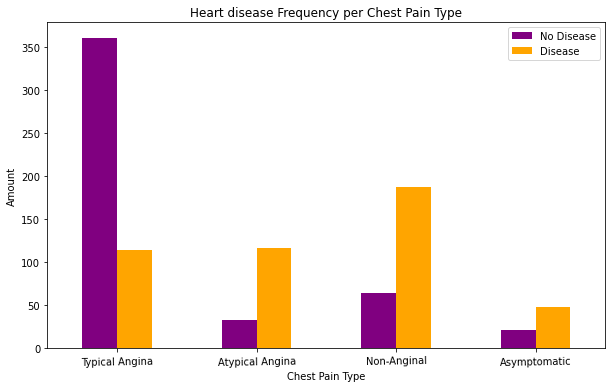

In [35]:
#Heart Disease Frequency per Chest Pain Type
#cp = chest pain type

#0: Typical Angina: Chest pain related to the heart
#1: Atypical angina: Chest pain not related to the heart
#2: Non-Anginal pain: Typically esophageal spasms(not heart related)
#3: Asymptomatic: Chest pain not showing signs of disease
# Creat a plot of the crosstab of chest pain types against the target labels

pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['purple', 'orange'])
plt.title("Heart disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], rotation=1);

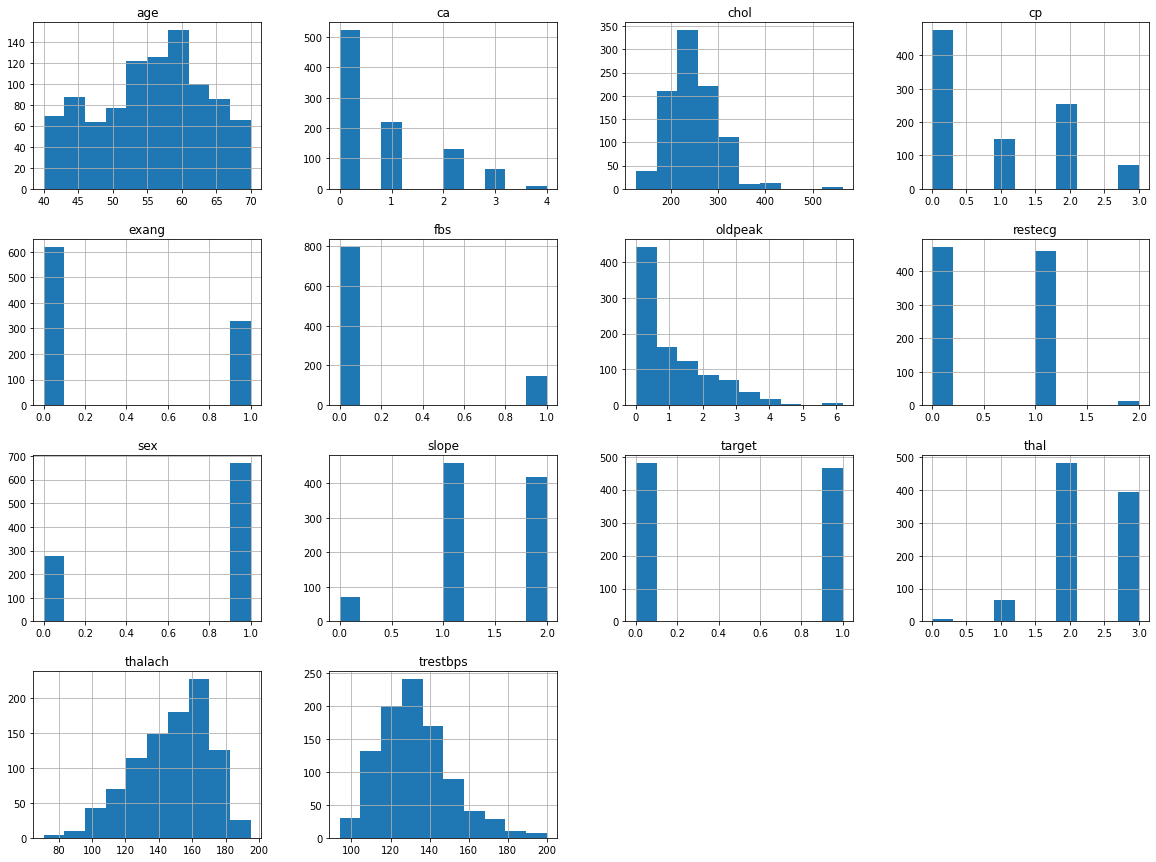

In [36]:
#***Data Visualization by histogram
df.hist(figsize=(20,15)) 
plt.show()

In [18]:
#***Modelling
# split data into X & y
x=df.drop('target',1)
y=df.target
# split the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

#We're going to model from Sklearn by LogisticRegression
model = LogisticRegression()

model.fit(x_train,y_train)

predict=model.predict(x_test)
print(predict)

acc=accuracy_score(predict,y_test)

conf=confusion_matrix(predict,y_test)

print(acc)
print(conf)

(758, 13) (190, 13) (758,) (190,)
[1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 0]
0.8421052631578947
[[78 11]
 [19 82]]


D:\anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
